## Access to Computers by Indian Schools in different School Categories

### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load datasets

In [2]:
comps = pd.read_csv('../data/percentage-of-schools-with-comps-2013-2016.csv')
comps.head()

State_UT     year  Primary_Only  Primary_with_U_Primary  \
0  Andaman & Nicobar Islands  2013-14         30.40                   73.68   
1  Andaman & Nicobar Islands  2014-15         30.94                   76.54   
2  Andaman & Nicobar Islands  2015-16         28.44                   78.57   
3             Andhra Pradesh  2013-14         12.73                   42.72   
4             Andhra Pradesh  2014-15         10.29                   44.15   

   Primary_with_U_Primary_Sec_HrSec  U_Primary_Only  U_Primary_With_Sec_HrSec  \
0                             89.74            0.00                    100.00   
1                             92.11          100.00                     94.74   
2                             92.50            0.00                     94.74   
3                             86.99           45.45                     17.07   
4                             88.46           50.00                     62.22   

   Primary_with_U_Primary_Sec  U_Primary_With_Sec  Sec_Only  Sec_with_HrSec.  \
0                       97.92                0.00      0.00           100.00   
1                      100.00                0.00      0.00           100.00   
2                      100.00                0.00      0.00           100.00   
3                       68.18               73.23     60.00            33.33   
4                       68.38               76.59     70.97            66.67   

   HrSec_Only  All Schools  
0        0.00        53.06  
1        0.00        57.25  
2        0.00        57.00  
3       19.32        29.57  
4       41.60        28.06

### View Profiling Report of the Comps dataset

In [3]:
from pandas_profiling import ProfileReport
prof = ProfileReport(comps)
prof

### Explore the comps dataset

In [4]:
#check for missing data
comps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   State_UT                          110 non-null    object 
 1   year                              110 non-null    object 
 2   Primary_Only                      110 non-null    float64
 3   Primary_with_U_Primary            110 non-null    float64
 4   Primary_with_U_Primary_Sec_HrSec  110 non-null    float64
 5   U_Primary_Only                    110 non-null    float64
 6   U_Primary_With_Sec_HrSec          110 non-null    float64
 7   Primary_with_U_Primary_Sec        110 non-null    float64
 8   U_Primary_With_Sec                110 non-null    float64
 9   Sec_Only                          110 non-null    float64
 10  Sec_with_HrSec.                   110 non-null    float64
 11  HrSec_Only                        110 non-null    float64
 12  All Scho

In [5]:
#check the uniques India states in the data 
comps['State_UT'].unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'All India'], dtype=object)

In [6]:
#check columns
comps.columns

Index(['State_UT', 'year', 'Primary_Only', 'Primary_with_U_Primary',
       'Primary_with_U_Primary_Sec_HrSec', 'U_Primary_Only',
       'U_Primary_With_Sec_HrSec', 'Primary_with_U_Primary_Sec',
       'U_Primary_With_Sec', 'Sec_Only', 'Sec_with_HrSec.', 'HrSec_Only',
       'All Schools'],
      dtype='object')

### Retrieve the records for all India States in the three academic years
The dataset contains records of each of the Indian States and 'ALL INDIA'states. These records summarizes the percentage of computer facilities in all indian states for three academic years in different school categories

In [12]:
plt.style.use('seaborn')
plt.rc('figure', figsize=(10, 8))  # to make all the graph the same size

#### First Melt the data and retrieve records for 'All India' and then Group the data by Year and School Level (Category).

In [8]:
comps_melted = pd.melt(comps, id_vars=['State_UT', 'year'], var_name='School_Level', value_name='Value')
comps_melted.head()

State_UT     year  School_Level  Value
0  Andaman & Nicobar Islands  2013-14  Primary_Only  30.40
1  Andaman & Nicobar Islands  2014-15  Primary_Only  30.94
2  Andaman & Nicobar Islands  2015-16  Primary_Only  28.44
3             Andhra Pradesh  2013-14  Primary_Only  12.73
4             Andhra Pradesh  2014-15  Primary_Only  10.29

In [9]:
all_india = comps_melted[comps_melted['State_UT'] == 'All India'].reset_index(drop=True)
all_india
all_india = all_india.groupby(['year', 'School_Level'], as_index=False).sum()
all_india.head()

year                School_Level  Value
0  2013-14                 All Schools  24.08
1  2013-14                  HrSec_Only  26.65
2  2013-14                Primary_Only   9.25
3  2013-14      Primary_with_U_Primary  42.14
4  2013-14  Primary_with_U_Primary_Sec  64.69

### Change in percentage of computer facilities in India Schools for the three academic year
The figure below shows the change in percentage of computer facilities in Schools in Indian States for the different categories or levels of Schools across the three academic years.

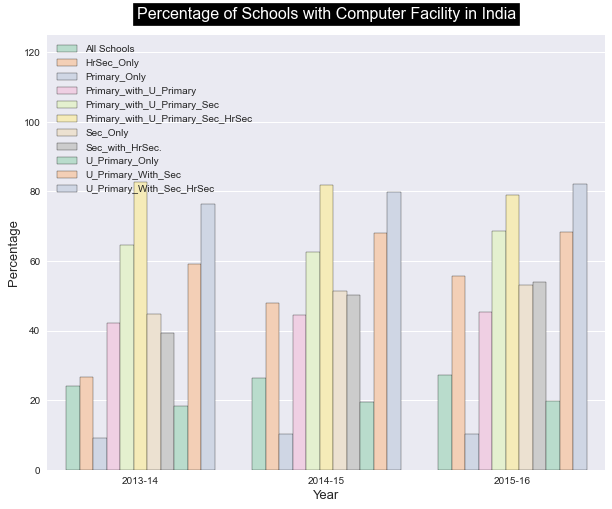

In [13]:
fig, ax = plt.subplots()
bar = sns.barplot(x="year",y='Value',hue='School_Level',data=all_india ,palette = 'Pastel2',edgecolor='black',ax=ax)
bar.set(ylim=(0, 125))
# highlighting the title
ax.set_title('Percentage of Schools with Computer Facility in India',size = 16 , pad = 16, color='white',bbox=dict(facecolor='black', alpha=1.0))

ax.set_ylabel('Percentage',size=13)
ax.set_xlabel('Year',size=13)

bar.legend(fancybox=True, framealpha=1, borderpad=0.5)

### Which India State had the highest percentage of computer facilities in Primary School Level?

<AxesSubplot:title={'center':'Percentage of Primary Schools with Computer Facilities'}, xlabel='State_UT'>

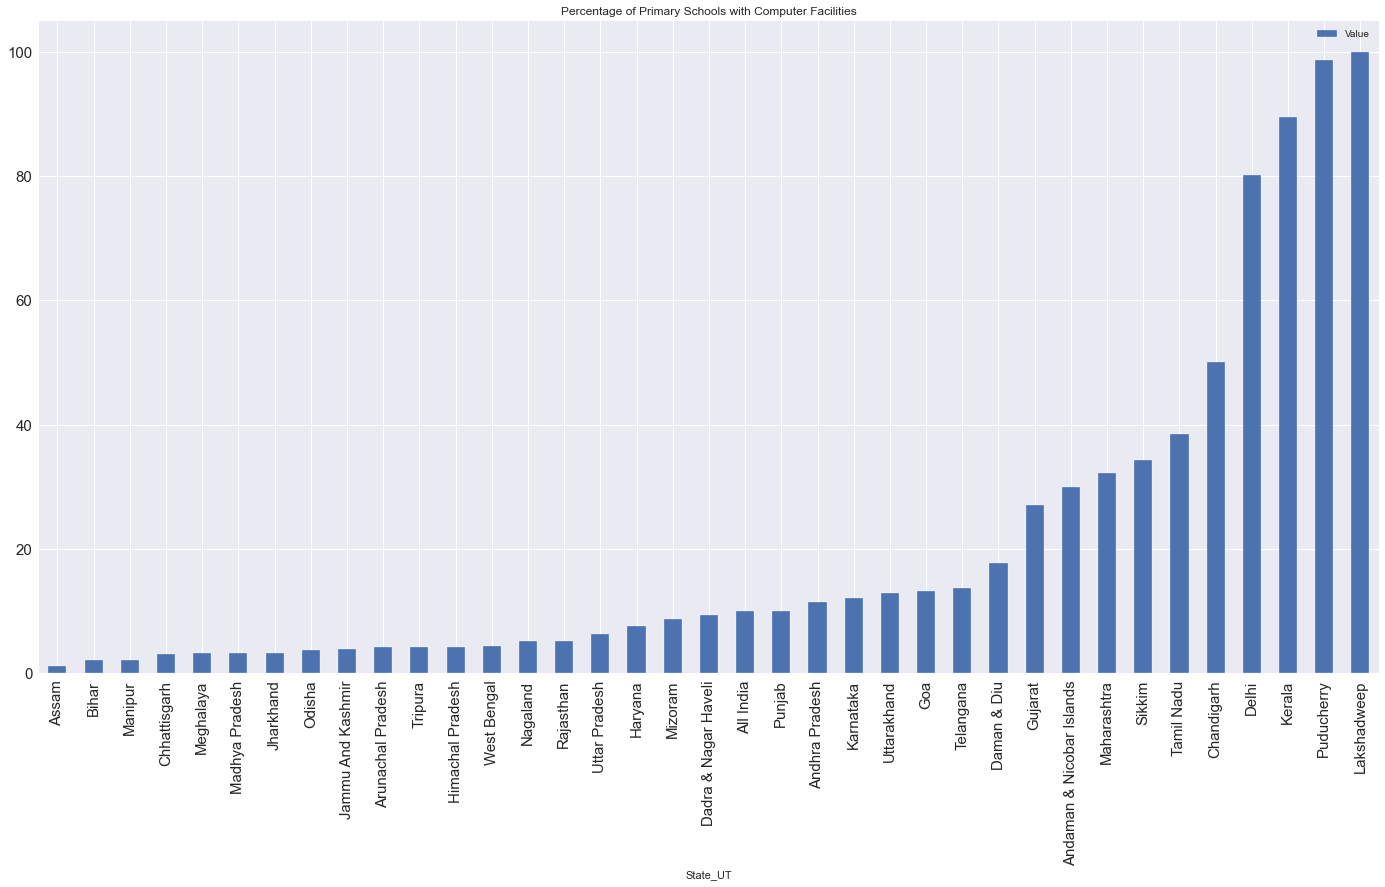

In [14]:
primary = comps_melted[comps_melted['School_Level'] == 'Primary_Only']
mean_primary = primary.groupby(['State_UT'], as_index=False).mean()
mean_primary.set_index('State_UT').sort_values('Value').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of Primary Schools with Computer Facilities')

From the bar chart above, we can conclude that 'Lakshadweep' had the highest percentage (100%) of computer facilities in Primary School Category while 'Assam' had the lowest percentage of computer facilities in the three academic years.

### Which India State had the highest percentage of computer facilities in Upper Primary School Level?

<AxesSubplot:title={'center':'Percentage of Upper Primary Schools with Computer Facilities'}, xlabel='State_UT'>

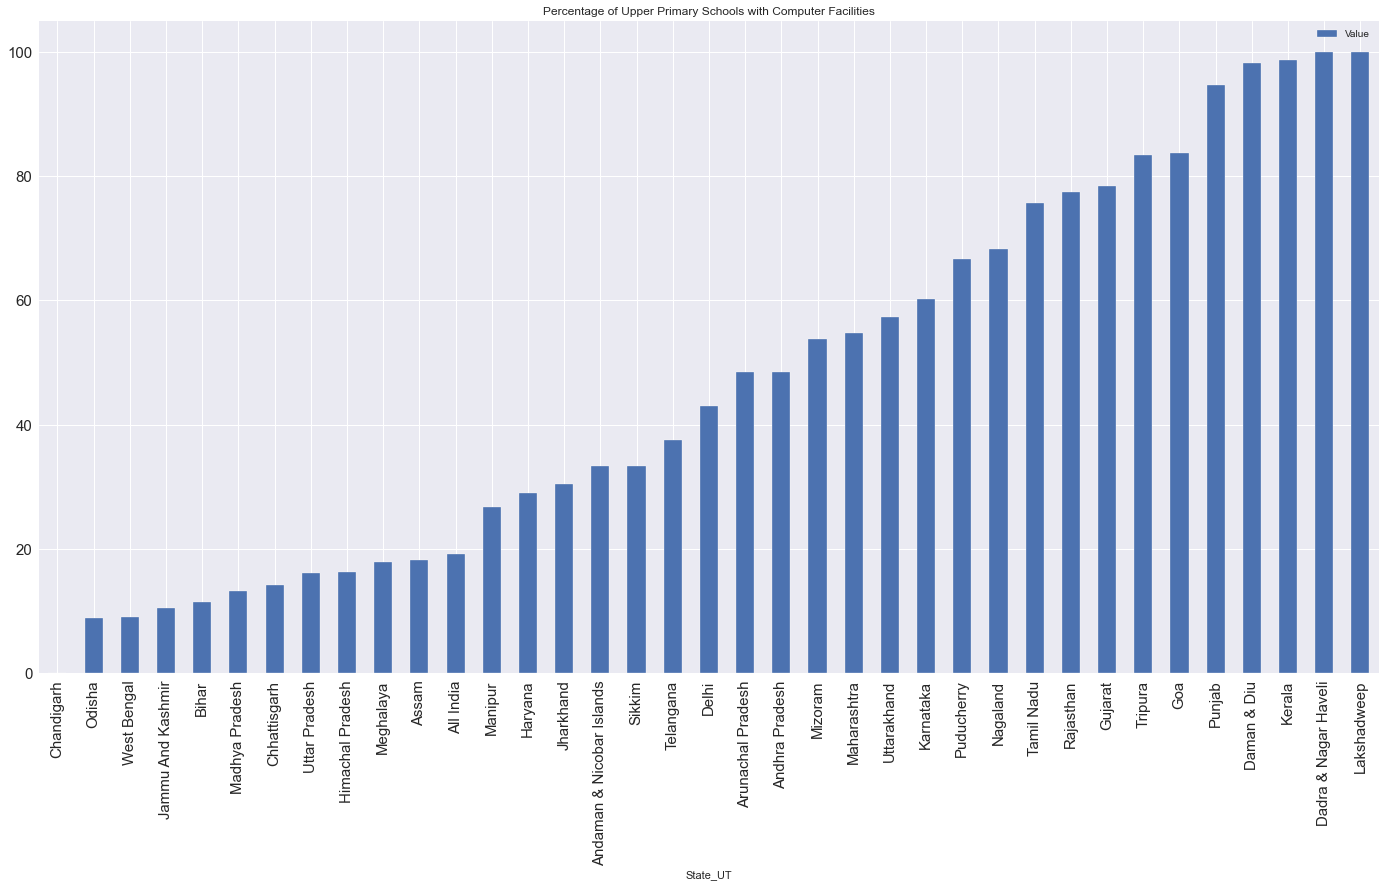

In [15]:
u_primary = comps_melted[comps_melted['School_Level'] == 'U_Primary_Only']
mean_u_primary = u_primary.groupby(['State_UT'], as_index=False).mean()
mean_u_primary.set_index('State_UT').sort_values('Value').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of Upper Primary Schools with Computer Facilities')

From the bar chart above, we can conclude that 'Lakshadweep' had the highest percentage (100%) of computer facilities in Upper Primary Schools Category while 'Chandigarh' had the lowest percentage (0%) of computer facilities in Upper primary Schools Category for the three academc years. This indicates that no upper primary school in Chandigarh had access to computer facilities.

### Which India State had the highest percentage of computer facilities in Secondary Level?

<AxesSubplot:title={'center':'Percentage of Secondary Schools with Computer Facilities'}, xlabel='State_UT'>

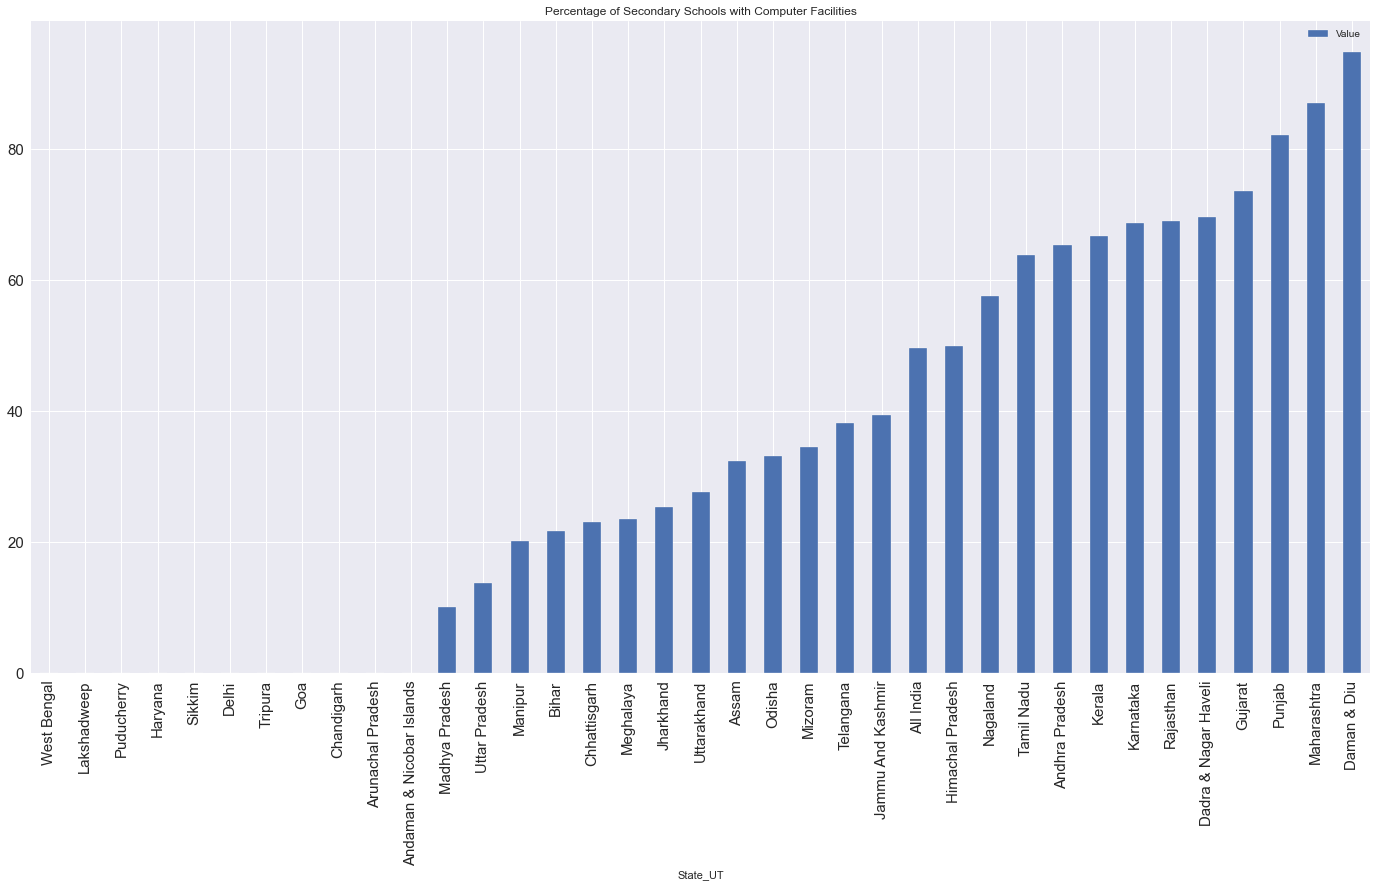

In [16]:
secondary = comps_melted[comps_melted['School_Level'] == 'Sec_Only']
mean_secondary = secondary.groupby(['State_UT'], as_index=False).mean()
mean_secondary.set_index('State_UT').sort_values('Value').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of Secondary Schools with Computer Facilities')

From the barchart above, 'Daman & Diu' had the highest percentage of computer facilities in Secondary Schools while 'West Bengal, Lakshadweep, Puducherry, Haryana, Sikkim, Delhi, Tripura, Goa, Chandigarh, Arunachal Pradesh and Andaman & Nicobar Islands' had the lowest percentage (0%) of computer facilities in Secondary Schools in the three academic years

### Which India State had the highest percentage of computer facilities in Higher Secondary Level?

<AxesSubplot:title={'center':'Percentage of Higer Secondary Schools with Computer Facilities'}, xlabel='State_UT'>

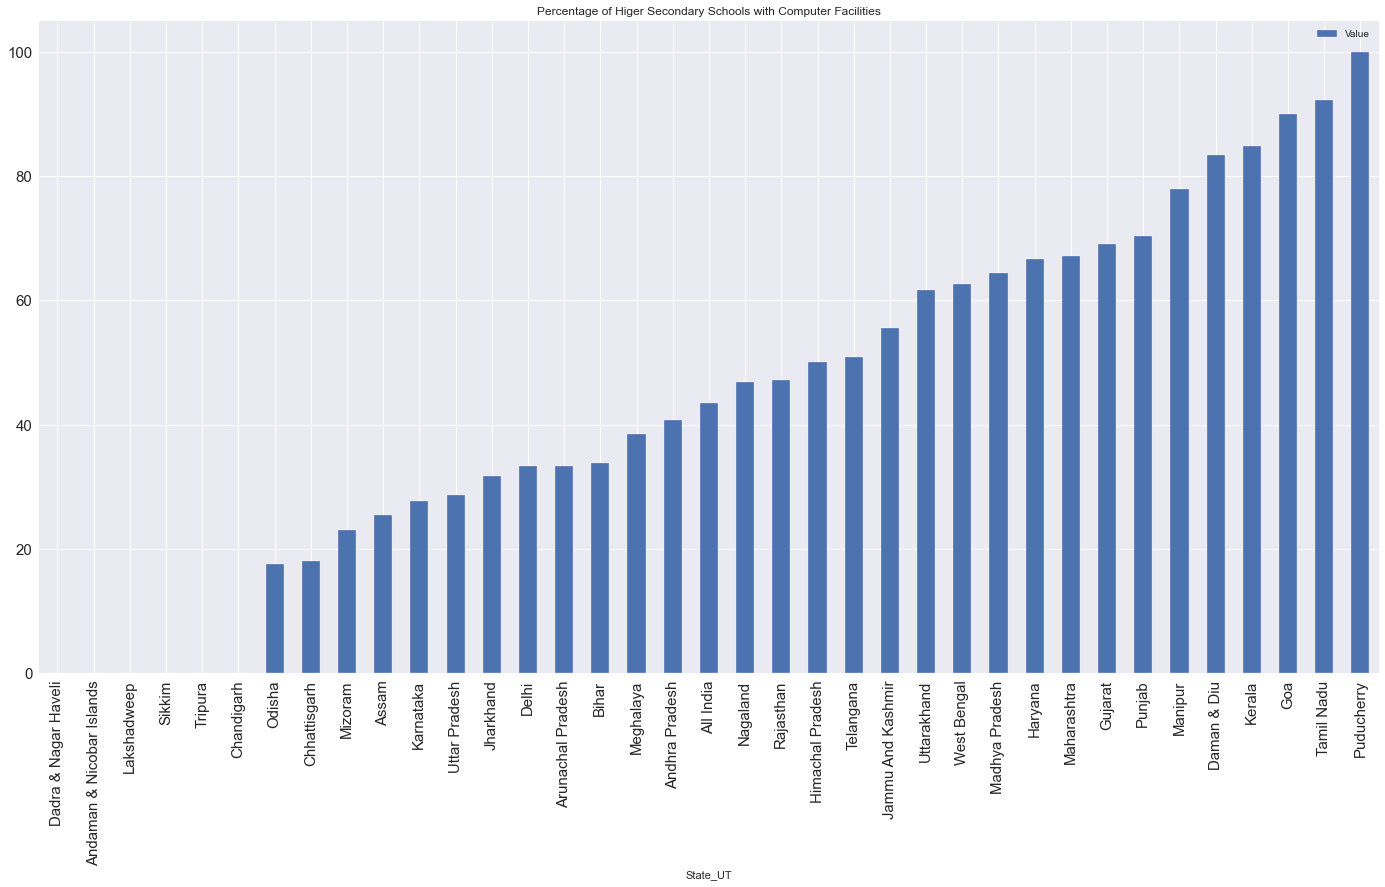

In [17]:
h_secondary = comps_melted[comps_melted['School_Level'] == 'HrSec_Only']
mean_h_secondary = h_secondary.groupby(['State_UT'], as_index=False).mean()
mean_h_secondary.set_index('State_UT').sort_values('Value').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of Higer Secondary Schools with Computer Facilities')

'Puducherry' had the highest percentage of comupter facilities in Higher Secondary Schools while 'Dadra & Nagar Haveli, Andaman & Nicobar Islands, Lakshadweep, Sikkim, Tripura and Chandigarh' had the lowest percentage of computer facilities in Higher Secondary Schools for the three academic years.

### Heatmap showing the percentage of computer facilities in all India States across different school levels

In [18]:
mean_comps = comps.groupby(['State_UT']).mean()
mean_comps.head()

Primary_Only  Primary_with_U_Primary  \
State_UT                                                          
All India                      9.976667               43.996667   
Andaman & Nicobar Islands     29.926667               76.263333   
Andhra Pradesh                11.496667               43.893333   
Arunachal Pradesh              4.146667               43.360000   
Assam                          1.130000               29.853333   

                           Primary_with_U_Primary_Sec_HrSec  U_Primary_Only  \
State_UT                                                                      
All India                                         81.230000       19.133333   
Andaman & Nicobar Islands                         91.450000       33.333333   
Andhra Pradesh                                    88.306667       48.483333   
Arunachal Pradesh                                 93.300000       48.430000   
Assam                                             72.660000       18.160000   

                           U_Primary_With_Sec_HrSec  \
State_UT                                              
All India                                 79.466667   
Andaman & Nicobar Islands                 96.493333   
Andhra Pradesh                            50.566667   
Arunachal Pradesh                         98.703333   
Assam                                     81.730000   

                           Primary_with_U_Primary_Sec  U_Primary_With_Sec  \
State_UT                                                                    
All India                                   65.340000           65.253333   
Andaman & Nicobar Islands                   99.306667            0.000000   
Andhra Pradesh                              68.826667           75.633333   
Arunachal Pradesh                           88.296667           80.400000   
Assam                                       49.556667           60.490000   

                            Sec_Only  Sec_with_HrSec.  HrSec_Only  All Schools  
State_UT                                                                        
All India                  49.706667        47.873333   43.443333    25.936667  
Andaman & Nicobar Islands   0.000000       100.000000    0.000000    55.770000  
Andhra Pradesh             65.396667        58.333333   40.783333    29.406667  
Arunachal Pradesh           0.000000        62.336667   33.333333    24.440000  
Assam                      32.326667        37.236667   25.413333     9.813333

<AxesSubplot:title={'center':'Percentage of Computer Facilities per State.'}, ylabel='State_UT'>

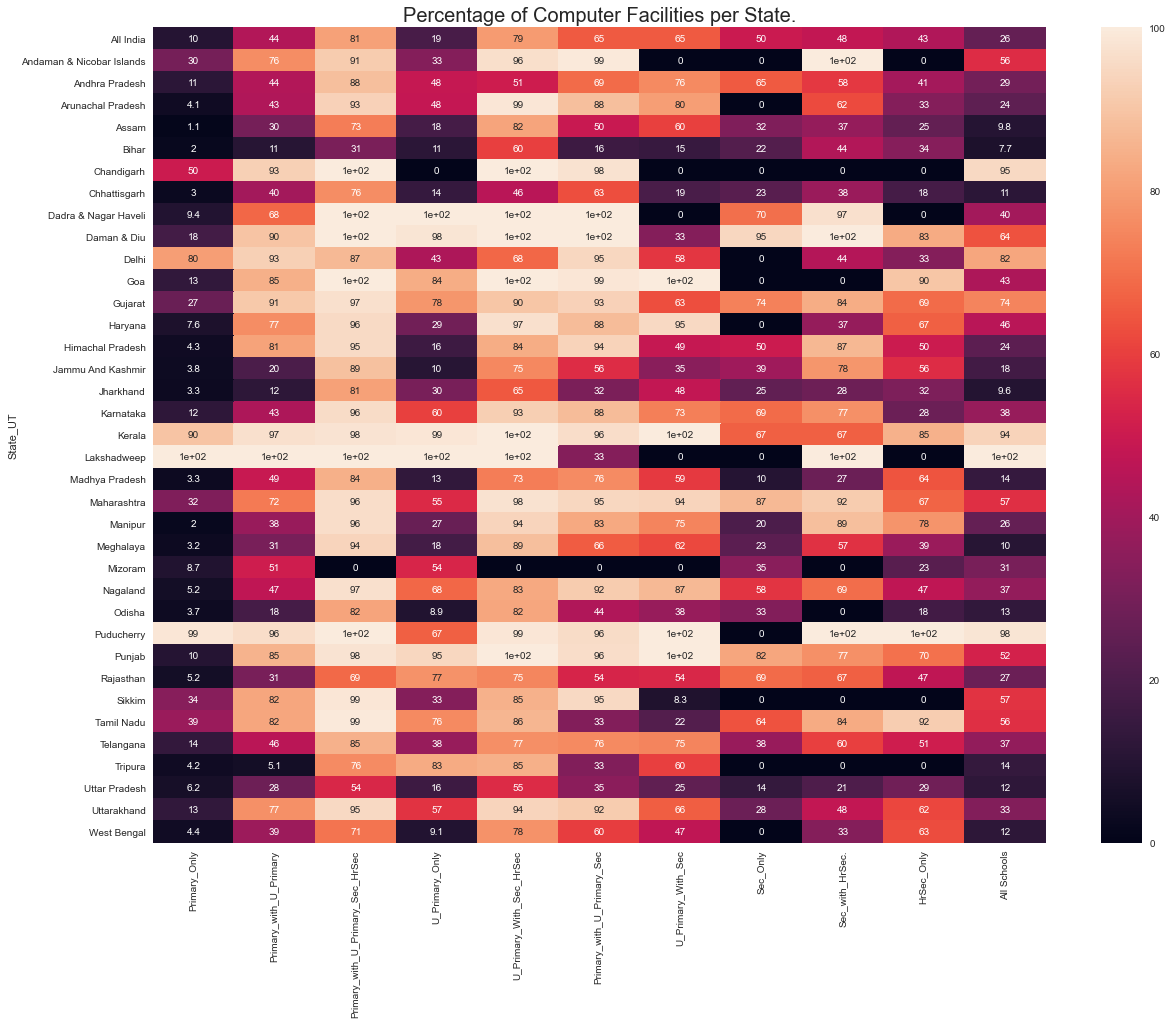

In [19]:
plt.figure(figsize=(20,15))
plt.rc('axes', titlesize=20)
plt.title('Percentage of Computer Facilities per State.')
sns.heatmap(mean_comps, annot=True)

### Which India state had the highest percentage of computer facilities in all School Levels?

In [20]:
all_schools = comps.loc[:,['State_UT','All Schools']]
all_schools = all_schools.groupby('State_UT', as_index=False).mean()
all_schools.head(10)

State_UT  All Schools
0                  All India    25.936667
1  Andaman & Nicobar Islands    55.770000
2             Andhra Pradesh    29.406667
3          Arunachal Pradesh    24.440000
4                      Assam     9.813333
5                      Bihar     7.676667
6                 Chandigarh    95.263333
7               Chhattisgarh    11.460000
8       Dadra & Nagar Haveli    40.320000
9                Daman & Diu    63.820000

<AxesSubplot:title={'center':'Percentage of All Schools with Computer Facilities per State'}, xlabel='State_UT'>

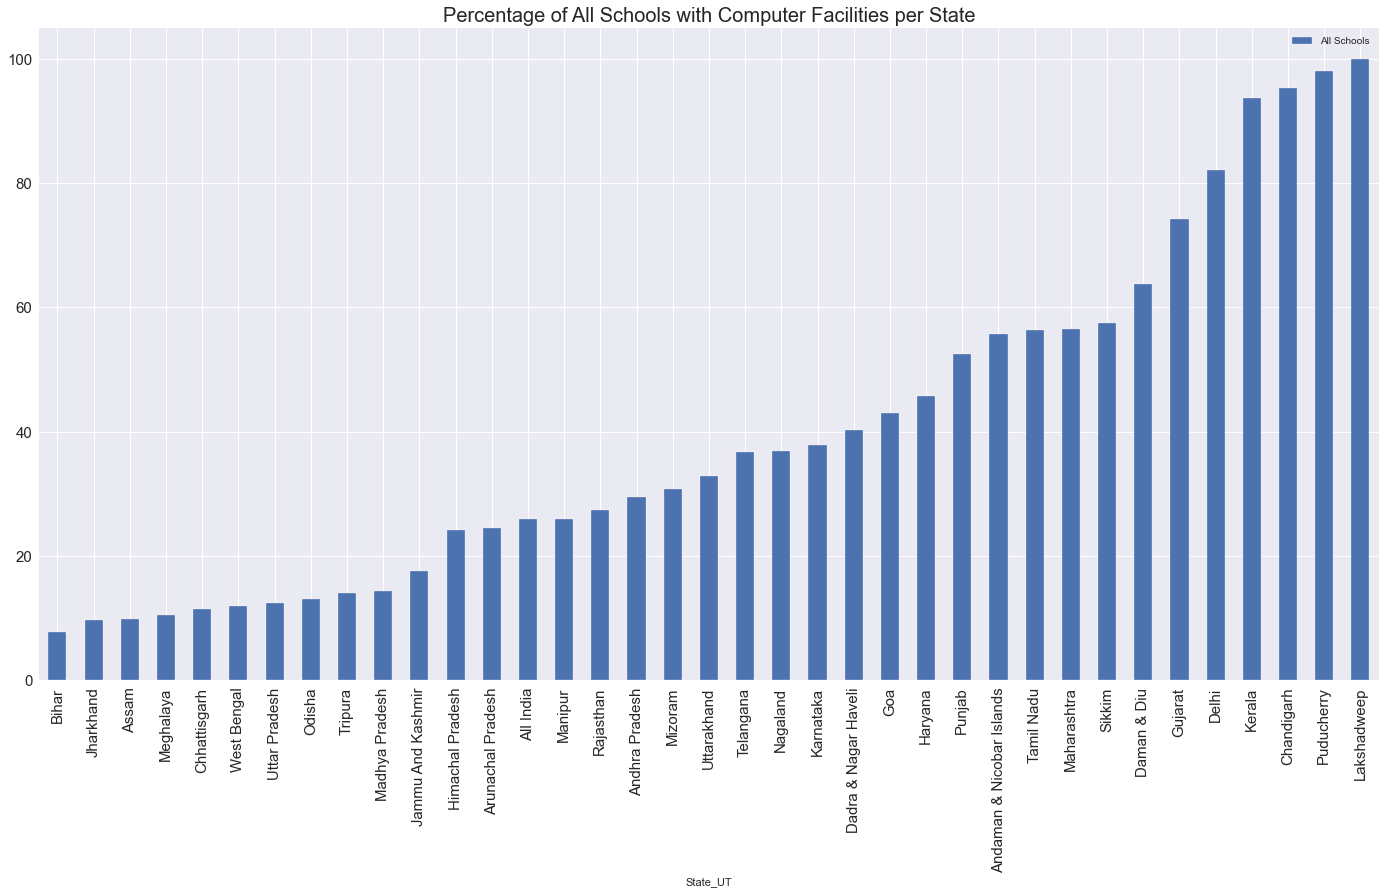

In [21]:
all_schools.set_index('State_UT').sort_values('All Schools').plot(kind='bar', fontsize = 15, figsize=(24,12), title ='Percentage of All Schools with Computer Facilities per State')

For all School Levels, 'Lakshadweep' had the highest percentage of computer facilities while 'Bihar' had the lowest percentage of computer facilities in all three academic years.